In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
%matplotlib inline

In [2]:
#Reading the movie information
movies = pd.read_csv('movies.csv')
#Reading the user information
ratings = pd.read_csv('ratings.csv')

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# Creating a new column containing the years in which the movies were relseased
movies['year'] = movies["title"].str.extract('(\d\d\d\d)',expand=False)
# Removing the year the movie was released from the title column 
movies['title'] = movies["title"].str.replace('(\(\d\d\d\d\))','')
# Getting rid of the whitespace
movies['title'] = movies['title'].apply(lambda x: x.strip())

/tmp/ipykernel_22515/2724869714.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  movies['title'] = movies["title"].str.replace('(\(\d\d\d\d\))','')


In [5]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [6]:
# Removing the genres column was it won't be needed for the recommendations
movies = movies.drop('genres', axis=1)

In [7]:
movies.head()

,movieId,title,year
0,1,Toy Story,1995
1,2,Jumanji,1995
2,3,Grumpier Old Men,1995
3,4,Waiting to Exhale,1995
4,5,Father of the Bride Part II,1995


In [8]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [9]:
# Getting of the timestamp column
ratings.drop("timestamp", axis=1, inplace=True)

In [10]:
ratings.head()

,userId,movieId,rating
0,1,16,4.0
1,1,24,1.5
2,1,32,4.0
3,1,47,4.0
4,1,50,4.0


## Explarotory Data Analysis

In [11]:
# Combining the movies and ratings dataframes
combined_df = pd.merge(movies,ratings,on='movieId')
combined_df.head()

,movieId,title,year,userId,rating
0,1,Toy Story,1995,2,5.0
1,1,Toy Story,1995,5,4.0
2,1,Toy Story,1995,8,5.0
3,1,Toy Story,1995,11,4.0
4,1,Toy Story,1995,14,4.0


In [12]:
# Checking out the average ratings of the movies
combined_df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Cowboys, The                                            5.0
Feast                                                   5.0
Superman/Batman: Public Enemies                         5.0
Beast of War, The (Beast, The)                          5.0
Hotel Chevalier (Part 1 of 'The Darjeeling Limited')    5.0
Name: rating, dtype: float64

In [13]:
# Checking out the number of ratings per movies
combined_df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Pulp Fiction                 325
Forrest Gump                 311
Shawshank Redemption, The    308
Jurassic Park                294
Silence of the Lambs, The    290
Name: rating, dtype: int64

In [14]:
# Creating a dataframe with the average ratings of the movies
ratings_df = pd.DataFrame(combined_df.groupby('title')['rating'].mean())
ratings_df.head()

,rating
title,
'71,3.500
'Hellboy': The Seeds of Creation,3.000
'Round Midnight,2.500
'Til There Was You,4.000
"'burbs, The",3.125


In [15]:
ratings_df['num_of_ratings'] = pd.DataFrame(combined_df.groupby('title')['rating'].count())
ratings_df.head()

,rating,num_of_ratings
title,,
'71,3.500,1
'Hellboy': The Seeds of Creation,3.000,1
'Round Midnight,2.500,1
'Til There Was You,4.000,3
"'burbs, The",3.125,20


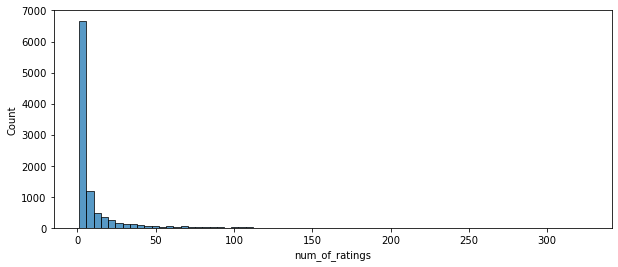

In [16]:
plt.figure(figsize=(10,4))
sns.histplot(ratings_df["num_of_ratings"], bins=70)
plt.show()

In [17]:
# Getting movies with the lowest number of ratings
ratings_df[ratings_df['num_of_ratings']==ratings_df["num_of_ratings"].min()]

,rating,num_of_ratings
title,,
'71,3.5,1
'Hellboy': The Seeds of Creation,3.0,1
'Round Midnight,2.5,1
'night Mother,3.0,1
10 to Midnight,2.5,1
...,...,...
Zozo,3.0,1
Zu: Warriors from the Magic Mountain (Xin shu shan jian ke),4.0,1
a/k/a Tommy Chong,4.5,1


In [18]:
ratings_df[ratings_df["num_of_ratings"] == 4]

,rating,num_of_ratings
title,,
12 Rounds,2.875,4
187 (One Eight Seven),3.875,4
1941,2.625,4
24: Redemption,3.250,4
3 Women (Three Women),3.875,4
...,...,...
"Yards, The",3.625,4
You Kill Me,3.500,4
"Young Victoria, The",4.000,4


In [19]:
# Getting movie with the highest number of ratings
ratings_df[ratings_df['num_of_ratings']==ratings_df["num_of_ratings"].max()]

,rating,num_of_ratings
title,,
Pulp Fiction,4.16,325


In [20]:
ratings_df.describe()

,rating,num_of_ratings
count,10007.000000,10007.000000
mean,3.177154,10.526531
std,0.814182,23.283058
min,0.500000,1.000000
25%,2.750000,1.000000
50%,3.266355,3.000000
75%,3.750000,8.000000
max,5.000000,325.000000


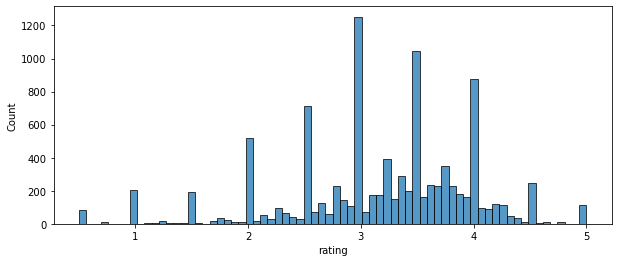

In [21]:
# Getting the distribution of the ratings
plt.figure(figsize=(10,4))
sns.histplot(ratings_df["rating"], bins=70)
plt.show()

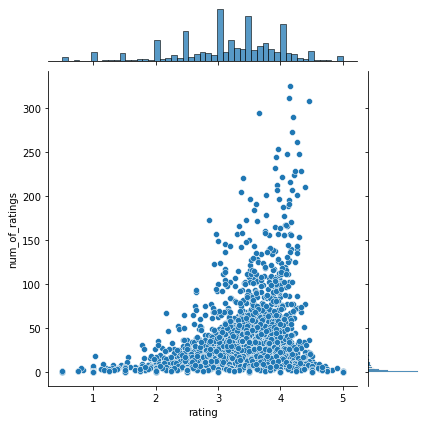

In [22]:
sns.jointplot(x='rating',y='num_of_ratings',data=ratings_df)
plt.show()

In [23]:
# Grouping the data depending the users the watched and rated the movies
current_user_groups = ratings.groupby(['userId'])

In [24]:
ratings.groupby(['userId']).count()

,movieId,rating
userId,,
1,113,113
2,29,29
3,73,73
4,124,124
5,68,68
...,...,...
664,74,74
665,227,227
666,225,225


In [25]:
current_user_groups.get_group(614)

,userId,movieId,rating
93125,614,110,4.0
93126,614,260,5.0
93127,614,293,4.5
93128,614,296,4.5
93129,614,316,4.0
...,...,...,...
93292,614,102125,4.5
93293,614,102445,5.0
93294,614,102903,4.0
93295,614,108979,5.0


In [26]:
#Getting the total number of movies that were watched
movies["movieId"].nunique()

10329

In [27]:
# Getting the total number of users that watched the movies
ratings["userId"].nunique()

668

In [28]:
#Sorting the users according the most popular movies
current_user_groups = sorted(current_user_groups,  key=lambda x: len(x[1]), reverse=False)

In [29]:
current_user_groups

[(12,
       userId  movieId  rating
  929      12        3     3.0
  930      12       16     1.5
  931      12      235     3.0
  932      12      266     4.0
  933      12      350     1.0
  934      12      553     3.0
  935      12      594     4.5
  936      12      708     4.0
  937      12      750     2.5
  938      12     1080     4.0
  939      12     1101     4.0
  940      12     1208     1.0
  941      12     1225     1.0
  942      12     1258     2.5
  943      12     1917     2.0
  944      12     2012     4.0
  945      12     2174     4.0
  946      12     2710     4.0
  947      12     2797     4.0
  948      12     5952     4.0),
 (26,
        userId  movieId  rating
  2328      26       19     2.5
  2329      26      350     2.0
  2330      26      368     3.0
  2331      26      410     3.5
  2332      26      442     1.5
  2333      26      474     3.0
  2334      26      708     2.5
  2335      26      786     1.5
  2336      26      912     4.0
  2337      26 

In [30]:
# Having a look at the first 2 users as well as the movies they watched and rated
current_user_groups[:2]

[(12,
       userId  movieId  rating
  929      12        3     3.0
  930      12       16     1.5
  931      12      235     3.0
  932      12      266     4.0
  933      12      350     1.0
  934      12      553     3.0
  935      12      594     4.5
  936      12      708     4.0
  937      12      750     2.5
  938      12     1080     4.0
  939      12     1101     4.0
  940      12     1208     1.0
  941      12     1225     1.0
  942      12     1258     2.5
  943      12     1917     2.0
  944      12     2012     4.0
  945      12     2174     4.0
  946      12     2710     4.0
  947      12     2797     4.0
  948      12     5952     4.0),
 (26,
        userId  movieId  rating
  2328      26       19     2.5
  2329      26      350     2.0
  2330      26      368     3.0
  2331      26      410     3.5
  2332      26      442     1.5
  2333      26      474     3.0
  2334      26      708     2.5
  2335      26      786     1.5
  2336      26      912     4.0
  2337      26 

In [31]:
# Movies watched by and rated by the user who needs movie recommendations
new_user_movies = [
            {'title':'Grumpier Old Men', 'rating':3.0},
            {'title':'Casino', 'rating':2.5},
            {'title':'Ed Wood', 'rating':3.0},
            {'title':"Legends of the Fall", 'rating':4},
            {'title':'Client, The', 'rating':1.0},
            {'title':'Snow White and the Seven Dwarfs', 'rating':4.5}            
         ] 

new_user_movies = pd.DataFrame(new_user_movies)
new_user_movies

,title,rating
0,Grumpier Old Men,3.0
1,Casino,2.5
2,Ed Wood,3.0
3,Legends of the Fall,4.0
4,"Client, The",1.0
5,Snow White and the Seven Dwarfs,4.5


In [32]:
# Getting the ids of the movies that the new user watched
new_user_movieids = movies[movies['title'].isin(new_user_movies['title'].tolist())]
new_user_movies = pd.merge(new_user_movieids, new_user_movies)

#Dropping the year column as it is not relevant for the exercise
new_user_movies = new_user_movies.drop('year',axis= 1)
new_user_movies


,movieId,title,rating
0,3,Grumpier Old Men,3.0
1,16,Casino,2.5
2,235,Ed Wood,3.0
3,266,Legends of the Fall,4.0
4,350,"Client, The",1.0
5,594,Snow White and the Seven Dwarfs,4.5


In [33]:
# Initializing the dictionary where the Cosine similarity will be stored
similarity_dict = {}

#For every user group in our subset
for name, group in current_user_groups:
    # Getting information of a particular user
    group = group.sort_values(by='movieId')
    nRatings = len(group)

    #Get the review scores for the movies they both watched
    current_user = group[group['movieId'].isin(new_user_movies['movieId'].tolist())]
    current_user_list = current_user['rating'].tolist()
    
    # Sorting the movies from the new user by their ids
    new_user = new_user_movies.sort_values(by='movieId')
    new_user = new_user[new_user['movieId'].isin(group['movieId'].tolist())]
    new_user_list = new_user['rating'].tolist()
     
    ## Calculating the pearson correlation between two users
    if len(current_user_list) > 1 :
        similarity_dict[name] = float(cosine_similarity(np.array(new_user_list).reshape(1,-1), np.array(current_user_list).reshape(1,-1)))
    else :
        similarity_dict[name] = 0
        

In [34]:
similarity_dict.items()

dict_items([(12, 0.9921572983305679), (26, 0), (48, 0), (51, 0), (58, 0), (125, 0), (191, 0), (214, 0), (257, 0), (288, 0), (313, 0), (324, 0), (350, 0), (388, 0), (464, 0.9671691143403984), (497, 0), (517, 0), (645, 0), (654, 0), (14, 0), (90, 0), (99, 0), (131, 0), (142, 0), (172, 0), (200, 0), (217, 0), (237, 0), (340, 0), (355, 0), (360, 0), (398, 0), (431, 0), (441, 0), (514, 0), (550, 0), (595, 0), (73, 0), (76, 0), (256, 0), (293, 0), (379, 0), (404, 0), (523, 0), (608, 0), (653, 0), (10, 0), (43, 0), (81, 0), (82, 0), (184, 0.9200239789895804), (249, 0), (307, 0), (323, 0), (487, 0), (39, 0), (98, 0), (212, 0), (377, 0), (406, 0), (467, 0), (477, 0), (503, 0), (638, 0), (660, 0), (68, 0), (225, 0), (251, 0), (346, 0), (391, 0), (407, 0), (468, 0), (500, 0), (553, 0), (570, 0), (571, 0), (635, 0), (56, 0), (67, 0.9230769230769229), (216, 0), (243, 0), (279, 0), (284, 0), (302, 0), (332, 0), (351, 0), (452, 0), (472, 0), (491, 0), (49, 0), (55, 0), (116, 0), (129, 0), (186, 0), (

In [35]:
# Making the dataframe with the similarity index of the old users and the new users
similarity_df = pd.DataFrame.from_dict(similarity_dict, orient='index')
similarity_df.columns = ['similarityIndex']
similarity_df['userId'] = similarity_df.index
similarity_df.index = range(len(similarity_df))
similarity_df.head()

,similarityIndex,userId
0,0.992157,12
1,0.000000,26
2,0.000000,48
3,0.000000,51
4,0.000000,58


In [36]:
similarity_df[similarity_df["similarityIndex"] == similarity_df["similarityIndex"].max()]

,similarityIndex,userId
588,0.999904,386


In [37]:
# Listing the old users that have most similar taste with the new user
similar_users=similarity_df.sort_values(by='similarityIndex', ascending=False)[0:50]
similar_users.head()

,similarityIndex,userId
588,0.999904,386
616,0.999835,615
577,0.999800,584
657,0.999480,451
466,0.999056,625


In [38]:
# Merging the dataframes of the most_similar_users and the ratings
similar_users_rating=similar_users.merge(ratings, left_on='userId', right_on='userId', how='inner')
similar_users_rating.head()

,similarityIndex,userId,movieId,rating
0,0.999904,386,1,3.0
1,0.999904,386,16,3.0
2,0.999904,386,29,2.5
3,0.999904,386,47,3.0
4,0.999904,386,50,3.5


In [39]:
# Multiplying the user similarity index by the their ratings
similar_users_rating['weightedRating'] = similar_users_rating['similarityIndex']*similar_users_rating['rating']
similar_users_rating.head()

,similarityIndex,userId,movieId,rating,weightedRating
0,0.999904,386,1,3.0,2.999711
1,0.999904,386,16,3.0,2.999711
2,0.999904,386,29,2.5,2.499759
3,0.999904,386,47,3.0,2.999711
4,0.999904,386,50,3.5,3.499662


In [40]:
# Getting the sums of the similarityindex and the weighted ratin for each movies
similar_users_rating = similar_users_rating.groupby('movieId').sum()[['similarityIndex','weightedRating']]
similar_users_rating.columns = ['sum_similarityIndex','sum_weightedRating']
similar_users_rating.head()

,sum_similarityIndex,sum_weightedRating
movieId,,
1,30.477066,116.542477
2,16.699653,54.481096
3,14.676815,51.331719
4,2.931849,8.806073
5,9.788945,29.369851


In [41]:
#Creates an empty dataframe for the recommended movies
recommendation_df = pd.DataFrame()
# Getting the weighted average of each movie
recommendation_df['weighted average recommendation score'] = similar_users_rating['sum_weightedRating']/similar_users_rating['sum_similarityIndex']
recommendation_df.reset_index(inplace=True)
recommendation_df.head()

,movieId,weighted average recommendation score
0,1,3.823940
1,2,3.262409
2,3,3.497470
3,4,3.003590
4,5,3.000308


In [42]:
# Getting the movie titles
movie_titles = movies[movies['movieId'].isin(recommendation_df['movieId'].tolist())]
recommendation_df = pd.merge(movie_titles,recommendation_df)

In [43]:
# Sorting the movies by the weighted average recommendation score
recommendation_df = recommendation_df.sort_values(by='weighted average recommendation score', ascending=False)
recommendation_df.head()

,movieId,title,year,weighted average recommendation score
2480,4349,Catch-22,1970,5.0
3348,6920,"Cercle Rouge, Le (Red Circle, The)",1970,5.0
3460,7210,My Darling Clementine,1946,5.0
3535,7566,28 Up,1985,5.0
3539,7577,"Magic Flute, The (Trollflöjten)",1975,5.0
